In [1]:
##importer les librairies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spambase.data')
data.shape

(4600, 58)

In [3]:
data.head(5)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
l1=[]
l2=[]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size=0.7, random_state = 0)

In [6]:
X_test.shape

(1840, 57)

In [24]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.model_selection import StratifiedKFold
##Training the K-NN model of the training set(KPPV (à 5 voisins))
classifierKnn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
classifierKnn.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)
scores = cross_val_score(classifierKnn, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne du KPPV est" , 1-scores.mean())
l1.append('KNeighborsClassifier')
l2.append(1-scores.mean())

[0.89751553 0.87888199 0.91149068 0.87267081 0.89906832]
L'erreure de validation moyenne du KPPV est 0.1080745341614906


In [26]:
##Training the Decision Tree Classification model on the Training set (Arbre de décision)
classifierTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
classifierTree.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)
scores = cross_val_score(classifierTree, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne de l'Arbre de décision est" , 1-scores.mean())
l1.append('DecisionTreeClassifier')
l2.append(1-scores.mean())



[0.89906832 0.90838509 0.89285714 0.87732919 0.89751553]
L'erreure de validation moyenne de l'Arbre de décision est 0.10496894409937896


In [27]:
##Training the Naive Bayes model on the Training set
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)
scores = cross_val_score(classifierNB, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne du Classificateur de Bayes est" , 1-scores.mean())
l1.append('GaussianNB')
l2.append(1-scores.mean())


[0.79813665 0.82608696 0.80900621 0.79503106 0.80590062]
L'erreure de validation moyenne du Classificateur de Bayes est 0.1931677018633542


In [28]:
##Training the Logistic Regression model on the Training set
classifierlogistic = LogisticRegression(solver='liblinear',max_iter=4000)
classifierlogistic.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)
scores = cross_val_score(classifierlogistic, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne de la regression logistique est" , 1-scores.mean())
l1.append('classifierlogistic')
l2.append(1-scores.mean())

[0.92701863 0.92546584 0.92080745 0.90372671 0.92391304]
L'erreure de validation moyenne de la regression logistique est 0.07981366459627337


In [29]:
##Training the SVM model on the Training set
classifierSVC = SVC(kernel='linear', random_state= 0)
classifierSVC.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)

scores = cross_val_score(classifierSVC, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne du SVM lineaire est" , 1-scores.mean())

l1.append('classifierSVC')
l2.append(1-scores.mean())



[0.93167702 0.92701863 0.91304348 0.91459627 0.92546584]
L'erreure de validation moyenne du SVM lineaire est 0.07763975155279501


In [30]:
##Training the Bagging Classification model on the Training set (Arbre de décision)
classifierBagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'entropy', max_depth=5),n_estimators=15, random_state=0)
classifierBagging.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)
scores = cross_val_score(classifierBagging, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne du classifierBagging  est" , 1-scores.mean())

l1.append('classifierBagging')
l2.append(1-scores.mean())

[0.92701863 0.93322981 0.92236025 0.89596273 0.91614907]
L'erreure de validation moyenne du classifierBagging  est 0.081055900621118


In [31]:
##Training the Boosting Classification model on the Training set (Arbre de décision)
classifierGradientBoosting = GradientBoostingClassifier( n_estimators=200, learning_rate=0.1,max_depth=5, random_state=0)
classifierGradientBoosting.fit(X_train, y_train)

K_folds= StratifiedKFold(n_splits=5)
scores = cross_val_score(classifierGradientBoosting, X_train, y_train, cv=K_folds)
print(scores)

print("L'erreure de validation moyenne du classifierBoosting  est" , 1-scores.mean())
#GradientBoostingClassifier

l1.append('classifierGradientBoosting')
l2.append(1-scores.mean())



[0.95962733 0.94875776 0.94099379 0.9378882  0.95652174]
L'erreure de validation moyenne du classifierBoosting  est 0.05124223602484468


In [ ]:
np.random.seed(0)
number_of_features = 4600
X_train, y_train = make_classification(n_samples = 10000,
                                      n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.5, .5],
                                       random_state = 0)

def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

neural_network = KerasClassifier(build_fn=create_network, epochs=10,batch_size=100, verbose=0)                                

K_folds= StratifiedKFold(n_splits=5)
scorss = cross_val_score(neural_network, X_train, y_train, cv=K_folds)
print(scorss)
print("L'erreure de validation moyenne du réseau de neurone est" , 1-scorss.mean())
l1.append('classifierneural network')
l2.append(1-scorss.mean())


C:\Users\PC\AppData\Local\Temp/ipykernel_13324/1052005848.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasClassifier(build_fn=create_network, epochs=10,batch_size=100, verbose=0)


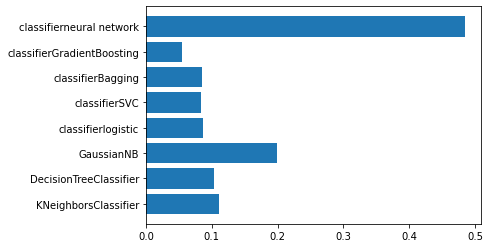

In [16]:
l11=np.array(l1)
l22=np.array(l2)
import matplotlib.pyplot as plt
plt.barh(l11,l22)
plt.show()